In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
time_detail_df = pd.read_csv(r"..\data\time_detail.csv")
time_detail_df

,modality,SOPInstanceUID,PatientID,updatedById,updatedAt,time_taken_secs,type
0,CXR,1.2.826.0.1.3680043.8.498.17503232932489933039...,91,U_60pMP6,2023-08-17 22:23:35.057000+00:00,NaN,Human_AI
1,CXR,1.2.826.0.1.3680043.8.498.85519129042533183941...,92,U_60pMP6,2023-08-17 22:26:30.183000+00:00,175.0,Human_AI
2,CXR,1.2.826.0.1.3680043.8.498.73347277183556866650...,93,U_60pMP6,2023-08-17 22:27:09.159000+00:00,38.0,Human_AI
3,CXR,1.2.826.0.1.3680043.8.498.24754023307407303172...,94,U_60pMP6,2023-08-17 22:28:03.264000+00:00,54.0,Human_AI
4,CXR,1.2.826.0.1.3680043.8.498.75402468681286910861...,95,U_60pMP6,2023-08-17 22:29:21.898000+00:00,78.0,Human_AI
...,...,...,...,...,...,...,...
1669,CXR,1.2.826.0.1.3680043.8.498.72022557534299208115...,311,U_QWX7k6,2023-08-19 14:29:47.918000+00:00,68.0,Human
1670,CXR,1.2.826.0.1.3680043.8.498.24896061035301106975...,312,U_QWX7k6,2023-08-19 14:30:36.885000+00:00,48.0,Human
1671,CXR,1.2.826.0.1.3680043.8.498.99221290123623506652...,313,U_QWX7k6,2023-08-19 14:31:36.576000+00:00,59.0,Human
1672,CXR,1.2.826.0.1.3680043.8.498.19790507960164126318...,314,U_QWX7k6,2023-08-19 14:32:14.136000+00:00,37.0,Human


In [3]:
modality_types = time_detail_df['type'].unique()
modality_types

array(['Human_AI', 'Human'], dtype=object)

In [4]:
# Group the data by 'updatedById' and 'type' and select the top 15 entries for each group
limited_entries_df = time_detail_df.groupby(['updatedById','type', 'modality']).head(15)
limited_entries_df

,modality,SOPInstanceUID,PatientID,updatedById,updatedAt,time_taken_secs,type
0,CXR,1.2.826.0.1.3680043.8.498.17503232932489933039...,91,U_60pMP6,2023-08-17 22:23:35.057000+00:00,NaN,Human_AI
1,CXR,1.2.826.0.1.3680043.8.498.85519129042533183941...,92,U_60pMP6,2023-08-17 22:26:30.183000+00:00,175.0,Human_AI
2,CXR,1.2.826.0.1.3680043.8.498.73347277183556866650...,93,U_60pMP6,2023-08-17 22:27:09.159000+00:00,38.0,Human_AI
3,CXR,1.2.826.0.1.3680043.8.498.24754023307407303172...,94,U_60pMP6,2023-08-17 22:28:03.264000+00:00,54.0,Human_AI
4,CXR,1.2.826.0.1.3680043.8.498.75402468681286910861...,95,U_60pMP6,2023-08-17 22:29:21.898000+00:00,78.0,Human_AI
...,...,...,...,...,...,...,...
1669,CXR,1.2.826.0.1.3680043.8.498.72022557534299208115...,311,U_QWX7k6,2023-08-19 14:29:47.918000+00:00,68.0,Human
1670,CXR,1.2.826.0.1.3680043.8.498.24896061035301106975...,312,U_QWX7k6,2023-08-19 14:30:36.885000+00:00,48.0,Human
1671,CXR,1.2.826.0.1.3680043.8.498.99221290123623506652...,313,U_QWX7k6,2023-08-19 14:31:36.576000+00:00,59.0,Human
1672,CXR,1.2.826.0.1.3680043.8.498.19790507960164126318...,314,U_QWX7k6,2023-08-19 14:32:14.136000+00:00,37.0,Human


In [5]:
# Use value_counts to count rows for each updatedById
count_by_updatedById = limited_entries_df['updatedById'].value_counts()

# Display the counts
print(count_by_updatedById)

U_69P3RQ    120
U_69PnEQ    120
U_6wPe98    120
U_OBKAWQ    120
U_OjydP8    120
U_OppZ0O    120
U_OqmjnO    120
U_QWX7k6    120
U_60pMP6    119
U_60pVk6    118
U_OX2wN6    117
U_6ARnj8    115
Name: updatedById, dtype: int64


In [6]:
# Drop null values in the 'time_taken_secs' column in limited_entries_df
limited_entries_df = limited_entries_df.dropna(subset=['time_taken_secs'])
limited_entries_df

,modality,SOPInstanceUID,PatientID,updatedById,updatedAt,time_taken_secs,type
1,CXR,1.2.826.0.1.3680043.8.498.85519129042533183941...,92,U_60pMP6,2023-08-17 22:26:30.183000+00:00,175.0,Human_AI
2,CXR,1.2.826.0.1.3680043.8.498.73347277183556866650...,93,U_60pMP6,2023-08-17 22:27:09.159000+00:00,38.0,Human_AI
3,CXR,1.2.826.0.1.3680043.8.498.24754023307407303172...,94,U_60pMP6,2023-08-17 22:28:03.264000+00:00,54.0,Human_AI
4,CXR,1.2.826.0.1.3680043.8.498.75402468681286910861...,95,U_60pMP6,2023-08-17 22:29:21.898000+00:00,78.0,Human_AI
5,CXR,1.2.826.0.1.3680043.8.498.17946533880169726011...,96,U_60pMP6,2023-08-17 22:31:02.977000+00:00,101.0,Human_AI
...,...,...,...,...,...,...,...
1669,CXR,1.2.826.0.1.3680043.8.498.72022557534299208115...,311,U_QWX7k6,2023-08-19 14:29:47.918000+00:00,68.0,Human
1670,CXR,1.2.826.0.1.3680043.8.498.24896061035301106975...,312,U_QWX7k6,2023-08-19 14:30:36.885000+00:00,48.0,Human
1671,CXR,1.2.826.0.1.3680043.8.498.99221290123623506652...,313,U_QWX7k6,2023-08-19 14:31:36.576000+00:00,59.0,Human
1672,CXR,1.2.826.0.1.3680043.8.498.19790507960164126318...,314,U_QWX7k6,2023-08-19 14:32:14.136000+00:00,37.0,Human


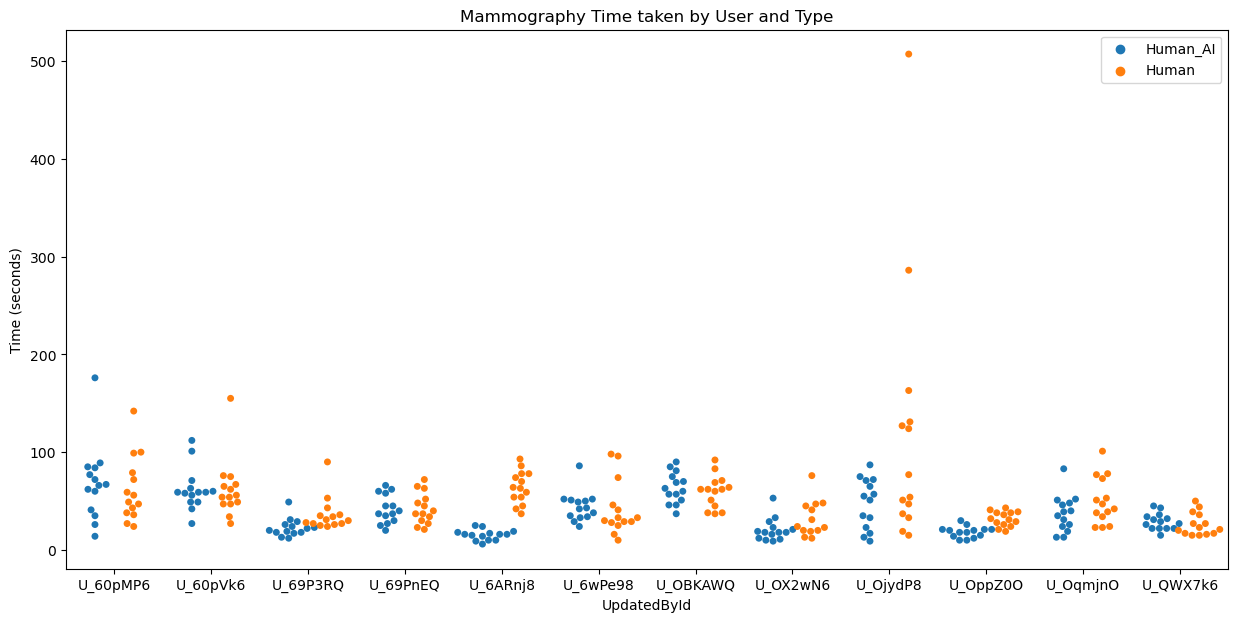

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Filter data for the 'Mammography' modality
mammography_df = limited_entries_df[limited_entries_df['modality'] == 'Mammography']

# Replace type labels
mammography_df['type'] = mammography_df['type'].replace({'Normal': 'Human', 'AI': 'Human_AI'})

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Swarm plot for 'Mammography'
sns.swarmplot(data=mammography_df, x='updatedById', y='time_taken_secs', hue='type', dodge=True)
ax.legend()
ax.set(xlabel='UpdatedById', ylabel='Time (seconds)')
ax.set_title('Mammography Time taken by User and Type')
plt.show()


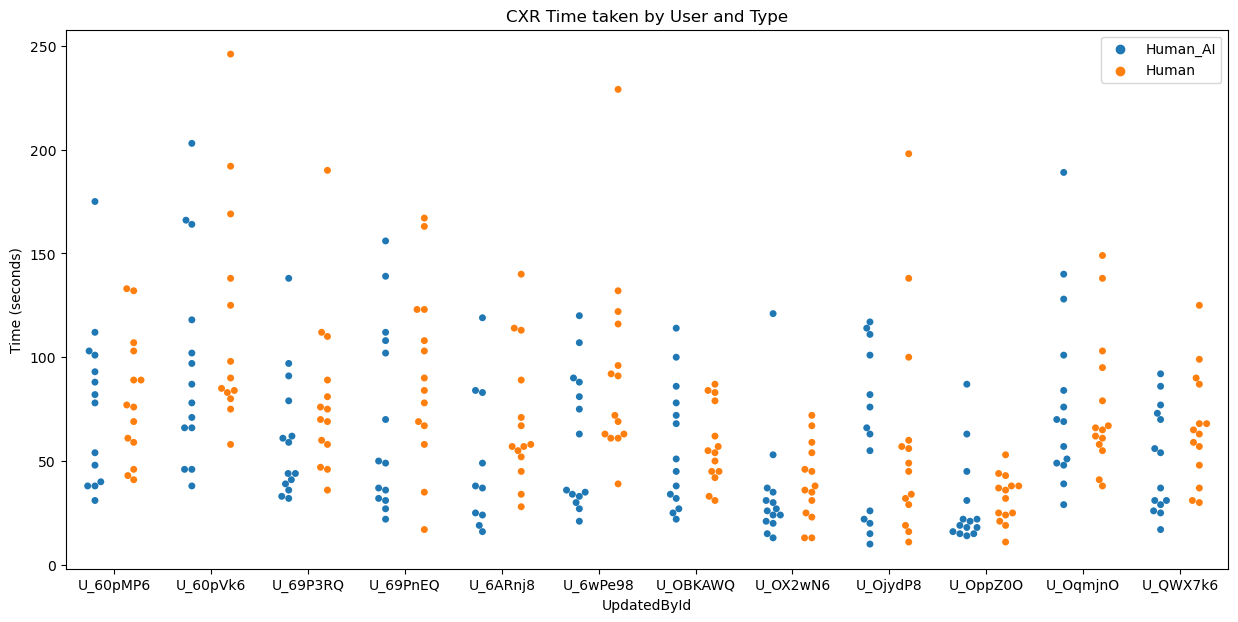

In [8]:
# Suppress warnings
warnings.filterwarnings("ignore")
# Filter data for the 'CXR' modality
cxr_df = limited_entries_df[limited_entries_df['modality'] == 'CXR']

# Replace type labels
cxr_df['type'] = cxr_df['type'].replace({'Normal': 'Human', 'AI': 'Human_AI'})

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Swarm plot for 'CXR'
sns.swarmplot(data=cxr_df, x='updatedById', y='time_taken_secs', hue='type', dodge=True)
ax.legend()
ax.set(xlabel='UpdatedById', ylabel='Time (seconds)')
ax.set_title('CXR Time taken by User and Type')
plt.show()


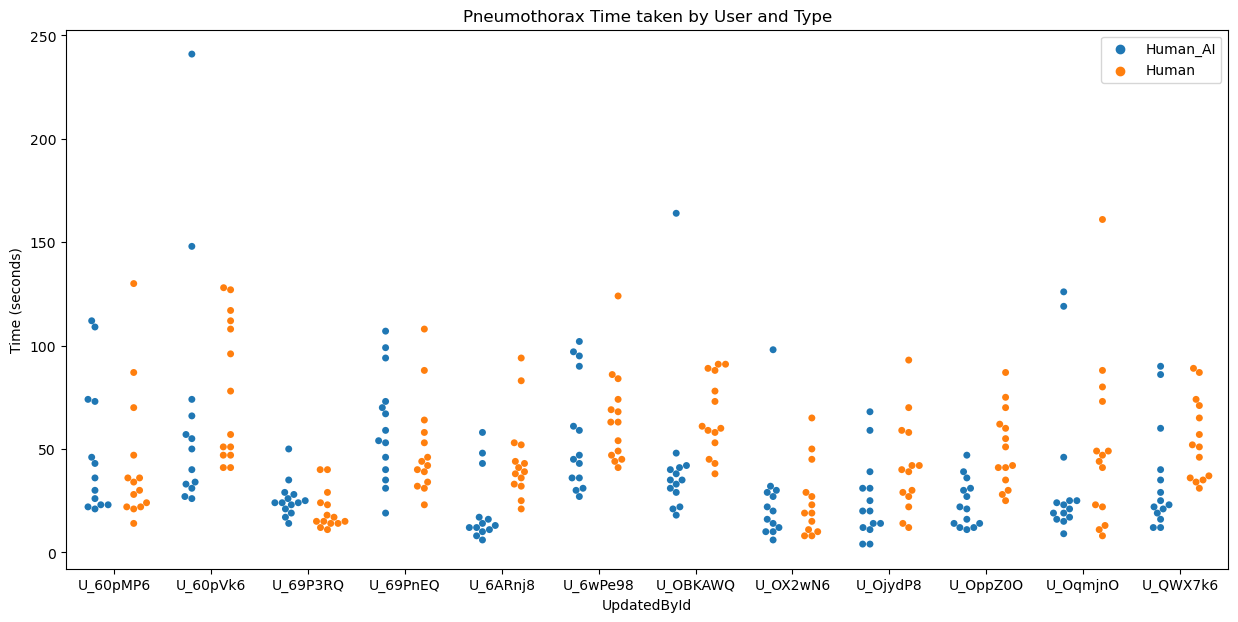

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the 'Pneumothorax' modality
pneumothorax_df = limited_entries_df[limited_entries_df['modality'] == 'Pneumothorax']

# Replace type labels
pneumothorax_df['type'] = pneumothorax_df['type'].replace({'Normal': 'Human', 'AI': 'Human_AI'})

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Swarm plot for 'Pneumothorax'
sns.swarmplot(data=pneumothorax_df, x='updatedById', y='time_taken_secs', hue='type', dodge=True)
ax.legend()
ax.set(xlabel='UpdatedById', ylabel='Time (seconds)')
ax.set_title('Pneumothorax Time taken by User and Type')
plt.show()


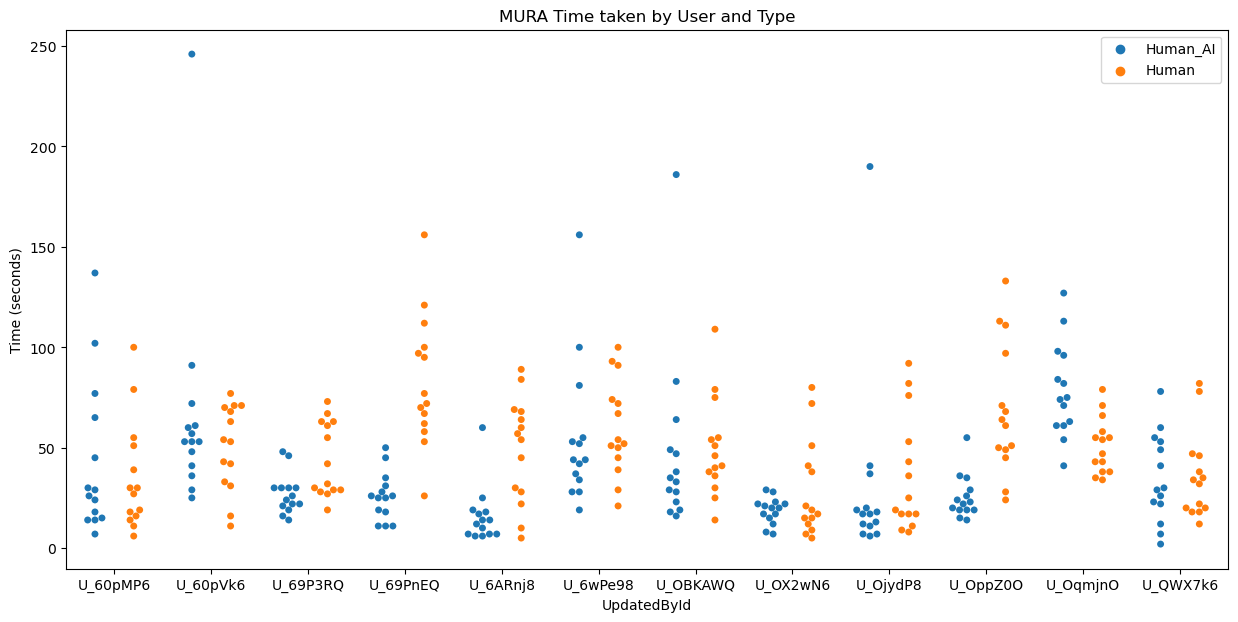

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the 'MURA' modality
mura_df = limited_entries_df[limited_entries_df['modality'] == 'MURA']

# Replace type labels
mura_df['type'] = mura_df['type'].replace({'Normal': 'Human', 'AI': 'Human_AI'})

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Swarm plot for 'MURA'
sns.swarmplot(data=mura_df, x='updatedById', y='time_taken_secs', hue='type', dodge=True)
ax.legend()
ax.set(xlabel='UpdatedById', ylabel='Time (seconds)')
ax.set_title('MURA Time taken by User and Type')
plt.show()


updatedById
U_60pMP6     9230.0
U_60pVk6     8265.0
U_69P3RQ     4447.0
U_69PnEQ    10371.0
U_6ARnj8     7542.0
U_6wPe98     6833.0
U_OBKAWQ     6205.0
U_OX2wN6     3061.0
U_OjydP8     7512.0
U_OppZ0O     3908.0
U_OqmjnO     6459.0
U_QWX7k6     4658.0
Name: time_taken_secs, dtype: float64


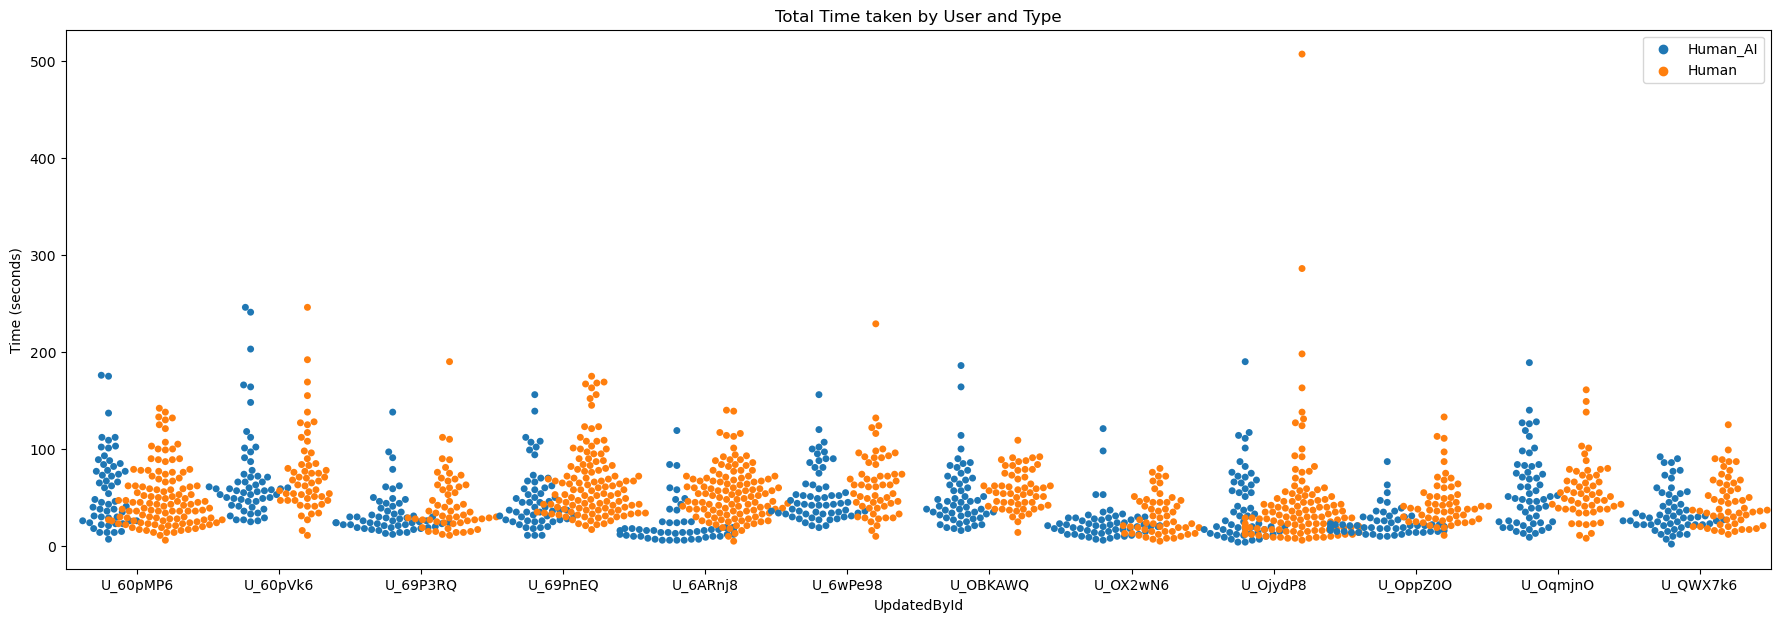

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Replace type labels
limited_entries_df['type'] = limited_entries_df['type'].replace({'Normal': 'Human', 'AI': 'Human_AI'})

# Create figure and axes
fig, ax = plt.subplots(figsize=(22, 7))

# Swarm plot for all modalities
sns.swarmplot(data=time_detail_df, x='updatedById', y='time_taken_secs', hue='type', dodge=True)
ax.legend()
ax.set(xlabel='UpdatedById', ylabel='Time (seconds)')
ax.set_title('Total Time taken by User and Type')

# Calculate total time taken by each user
total_time_per_user = time_detail_df.groupby('updatedById')['time_taken_secs'].sum()
print(total_time_per_user)
plt.show()


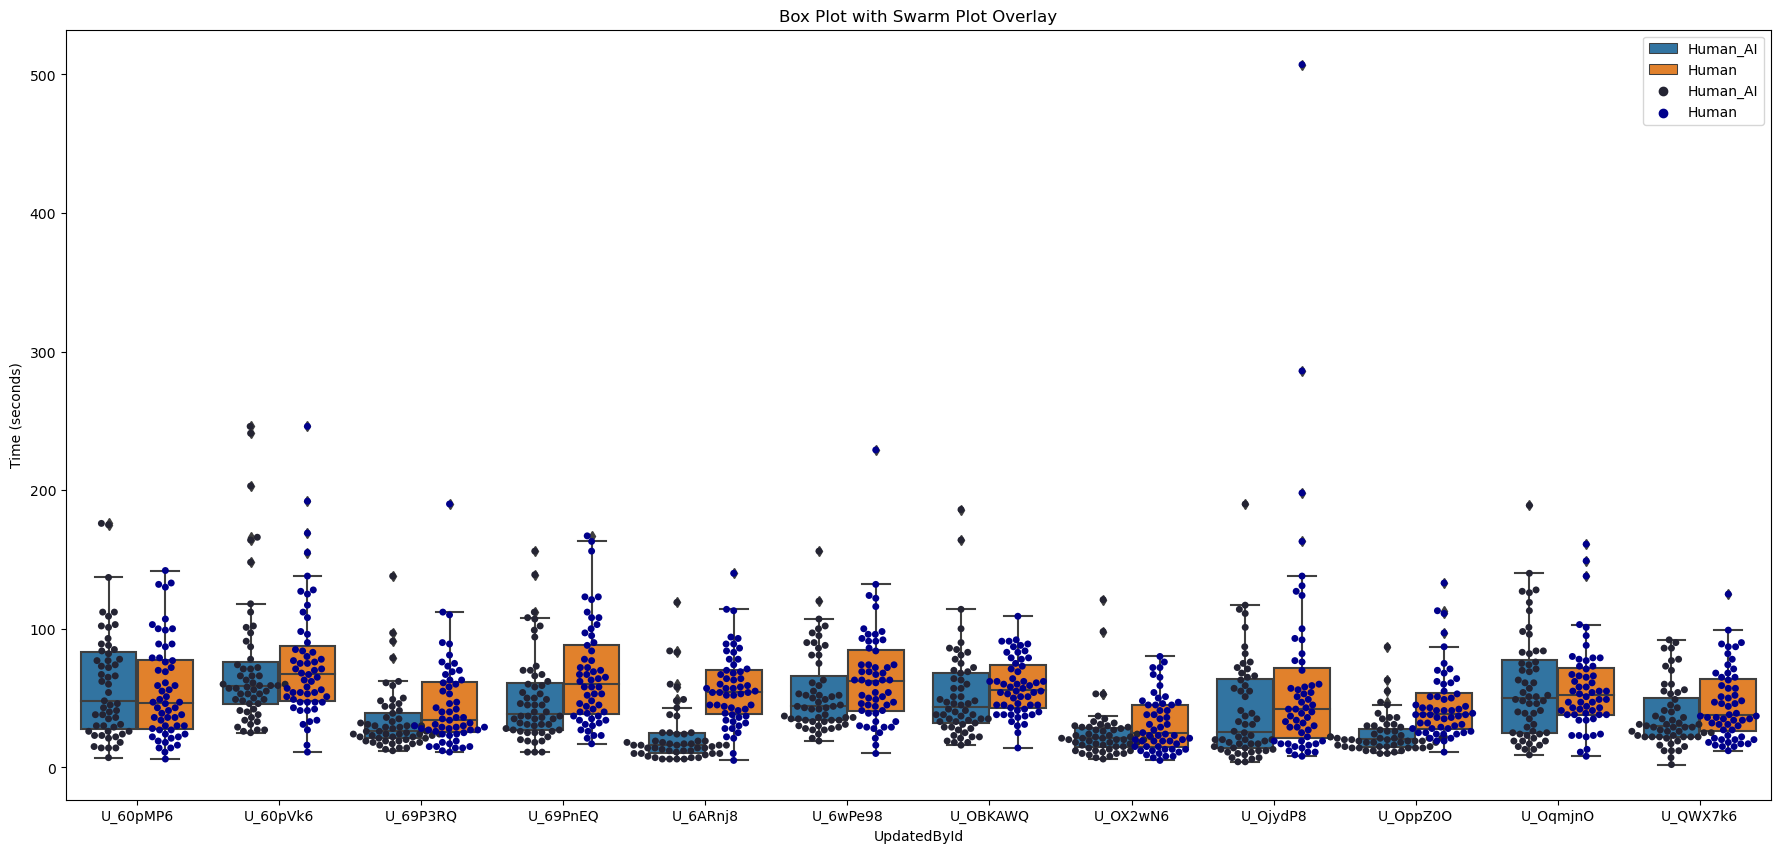

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings (not recommended unless you have a good reason)
warnings.filterwarnings("ignore")

# Create figure and axes
fig, ax = plt.subplots(figsize=(22, 10))

# Box plot with swarm plot overlay for sampled data
sns.boxplot(data=limited_entries_df, x='updatedById', y='time_taken_secs', hue='type', dodge=True, ax=ax)
sns.swarmplot(data=limited_entries_df, x='updatedById', y='time_taken_secs', hue='type', dodge=True, ax=ax, color='darkblue')  

ax.legend()
ax.set(xlabel='UpdatedById', ylabel='Time (seconds)')
ax.set_title('Box Plot with Swarm Plot Overlay')

plt.show()


## Tests for the significance of time difference

In [13]:
# Group the data by 'updatedById' and 'type' and select the top 15 entries for each group
limited_entries_df = time_detail_df.groupby(['updatedById','type', 'modality']).head(15)
limited_entries_df

,modality,SOPInstanceUID,PatientID,updatedById,updatedAt,time_taken_secs,type
0,CXR,1.2.826.0.1.3680043.8.498.17503232932489933039...,91,U_60pMP6,2023-08-17 22:23:35.057000+00:00,NaN,Human_AI
1,CXR,1.2.826.0.1.3680043.8.498.85519129042533183941...,92,U_60pMP6,2023-08-17 22:26:30.183000+00:00,175.0,Human_AI
2,CXR,1.2.826.0.1.3680043.8.498.73347277183556866650...,93,U_60pMP6,2023-08-17 22:27:09.159000+00:00,38.0,Human_AI
3,CXR,1.2.826.0.1.3680043.8.498.24754023307407303172...,94,U_60pMP6,2023-08-17 22:28:03.264000+00:00,54.0,Human_AI
4,CXR,1.2.826.0.1.3680043.8.498.75402468681286910861...,95,U_60pMP6,2023-08-17 22:29:21.898000+00:00,78.0,Human_AI
...,...,...,...,...,...,...,...
1669,CXR,1.2.826.0.1.3680043.8.498.72022557534299208115...,311,U_QWX7k6,2023-08-19 14:29:47.918000+00:00,68.0,Human
1670,CXR,1.2.826.0.1.3680043.8.498.24896061035301106975...,312,U_QWX7k6,2023-08-19 14:30:36.885000+00:00,48.0,Human
1671,CXR,1.2.826.0.1.3680043.8.498.99221290123623506652...,313,U_QWX7k6,2023-08-19 14:31:36.576000+00:00,59.0,Human
1672,CXR,1.2.826.0.1.3680043.8.498.19790507960164126318...,314,U_QWX7k6,2023-08-19 14:32:14.136000+00:00,37.0,Human


In [14]:
# Drop null values in the 'time_taken_secs' column in limited_entries_df
limited_entries_df = limited_entries_df.dropna(subset=['time_taken_secs'])
limited_entries_df

,modality,SOPInstanceUID,PatientID,updatedById,updatedAt,time_taken_secs,type
1,CXR,1.2.826.0.1.3680043.8.498.85519129042533183941...,92,U_60pMP6,2023-08-17 22:26:30.183000+00:00,175.0,Human_AI
2,CXR,1.2.826.0.1.3680043.8.498.73347277183556866650...,93,U_60pMP6,2023-08-17 22:27:09.159000+00:00,38.0,Human_AI
3,CXR,1.2.826.0.1.3680043.8.498.24754023307407303172...,94,U_60pMP6,2023-08-17 22:28:03.264000+00:00,54.0,Human_AI
4,CXR,1.2.826.0.1.3680043.8.498.75402468681286910861...,95,U_60pMP6,2023-08-17 22:29:21.898000+00:00,78.0,Human_AI
5,CXR,1.2.826.0.1.3680043.8.498.17946533880169726011...,96,U_60pMP6,2023-08-17 22:31:02.977000+00:00,101.0,Human_AI
...,...,...,...,...,...,...,...
1669,CXR,1.2.826.0.1.3680043.8.498.72022557534299208115...,311,U_QWX7k6,2023-08-19 14:29:47.918000+00:00,68.0,Human
1670,CXR,1.2.826.0.1.3680043.8.498.24896061035301106975...,312,U_QWX7k6,2023-08-19 14:30:36.885000+00:00,48.0,Human
1671,CXR,1.2.826.0.1.3680043.8.498.99221290123623506652...,313,U_QWX7k6,2023-08-19 14:31:36.576000+00:00,59.0,Human
1672,CXR,1.2.826.0.1.3680043.8.498.19790507960164126318...,314,U_QWX7k6,2023-08-19 14:32:14.136000+00:00,37.0,Human


In [15]:
import pandas as pd
from scipy import stats

# Group the limited entries DataFrame by the 'type' column
grouped = limited_entries_df.groupby('type')

# Get the time taken for the 'AI' and 'Normal' groups
time_ai = grouped.get_group('Human_AI')['time_taken_secs']
time_normal = grouped.get_group('Human')['time_taken_secs']

# Check normality using the Shapiro-Wilk test
_, p_value_ai = stats.shapiro(time_ai)
_, p_value_normal = stats.shapiro(time_normal)

# Check the normality of the data for 'AI' and 'Normal' types
alpha = 0.05  # Significance level
if p_value_ai > alpha and p_value_normal > alpha:
    print("The data for both 'AI' and 'Normal' types is normally distributed.")
else:
    print("The data for one or both types is not normally distributed.")

The data for one or both types is not normally distributed.


In [16]:
# Perform the Mann-Whitney U test
alpha = 0.05  # Significance level
u_stat, p_value = stats.mannwhitneyu(time_ai, time_normal, alternative='two-sided')
print(u_stat)
print(p_value)
# Print the results
if p_value < alpha:
    print("There is a significant time difference between 'AI' and 'Normal' groups (Mann-Whitney U test).")
else:
    print("There is no significant time difference between 'AI' and 'Normal' groups (Mann-Whitney U test).")

167862.0
1.1636269318821755e-14
There is a significant time difference between 'AI' and 'Normal' groups (Mann-Whitney U test).


In [17]:
import statsmodels.stats.power as smp

# Define the effect size (Cohen's d) based on your data or research
effect_size = 0.2

# Define the sample sizes for 'AI' and 'Normal' groups
sample_size_ai = len(time_ai)
sample_size_normal = len(time_normal)

# Define the desired significance level (alpha)
alpha = 0.05

# Calculate the power of the Mann-Whitney U test
power = smp.tt_ind_solve_power(effect_size=effect_size, nobs1=sample_size_ai, alpha=alpha, ratio=sample_size_normal / sample_size_ai, alternative='two-sided')

print(f"Power of the Mann-Whitney U test: {power}")


Power of the Mann-Whitney U test: 0.9543329564732969


## Significance of time difference by User

In [18]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu

# Filter the DataFrame to include only 'AI' and 'Normal' groups
filtered_df = limited_entries_df[limited_entries_df['type'].isin(['Human_AI', 'Human'])]

# Get unique 'updatedById' values
unique_users = filtered_df['updatedById'].unique()

# Create a list to store results
results = []

# Loop through each unique 'updatedById' value
for user_id in unique_users:
    user_data = filtered_df[filtered_df['updatedById'] == user_id]
    
    # Extract 'time_taken_secs' as numeric vectors for 'AI' and 'Normal' groups
    ai_data = pd.to_numeric(user_data[user_data['type'] == 'Human_AI']['time_taken_secs'], errors='coerce')
    normal_data = pd.to_numeric(user_data[user_data['type'] == 'Human']['time_taken_secs'], errors='coerce')
    
    # Check if 'ai_data' and 'normal_data' are numeric (no missing values)
    if not ai_data.isnull().any() and not normal_data.isnull().any():
        # Check normality for 'AI' and 'Normal' groups
        shapiro_ai = shapiro(ai_data)
        shapiro_normal = shapiro(normal_data)
        
        # Perform the Mann-Whitney U test
        mw_stat, mw_p_value = mannwhitneyu(ai_data, normal_data, alternative='two-sided')
        
        # Determine significance
        is_significant = mw_p_value < 0.05
        
        # Store the results in a dictionary
        result = {
            'User': user_id,
            'Normality': 'Normal' if shapiro_ai.pvalue > 0.05 and shapiro_normal.pvalue > 0.05 else 'Not Normal',
            'MannWhitneyPValue': mw_p_value,
            'Significant': 'Yes' if is_significant else 'No'
        }
        results.append(result)
    else:
        # Handle cases where data is not numeric or contains missing values
        result = {
            'User': user_id,
            'Normality': 'Not Numeric or Missing Values',
            'MannWhitneyPValue': None,
            'Significant': 'N/A'
        }
        results.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


        User   Normality  MannWhitneyPValue Significant
0   U_60pMP6  Not Normal       6.539085e-01          No
1   U_60pVk6  Not Normal       2.967836e-01          No
2   U_69P3RQ  Not Normal       2.616131e-02         Yes
3   U_69PnEQ  Not Normal       3.319367e-03         Yes
4   U_6ARnj8  Not Normal       8.140799e-11         Yes
5   U_6wPe98  Not Normal       5.119314e-02          No
6   U_OBKAWQ  Not Normal       1.825638e-02         Yes
7   U_OX2wN6  Not Normal       6.484904e-02          No
8   U_OjydP8  Not Normal       4.685066e-02         Yes
9   U_OppZ0O  Not Normal       7.996910e-10         Yes
10  U_OqmjnO  Not Normal       7.621594e-01          No
11  U_QWX7k6  Not Normal       6.934330e-02          No


In [19]:
import pandas as pd
import numpy as np
from scipy import stats

# Function to remove outliers based on z-score
def remove_outliers(data):
    z_scores = np.abs(stats.zscore(data))
    threshold = 3
    return data[(z_scores < threshold)]

# Group the filtered DataFrame by 'updatedById' and 'type' and calculate the mean and standard deviation of time for each group
mean_std_time = limited_entries_df.groupby(['updatedById', 'type'])['time_taken_secs'].agg(['mean', 'std', 'count'])

# Calculate the standard error for each group
mean_std_time['standard_error'] = mean_std_time['std'] / np.sqrt(mean_std_time['count'])

# Remove outliers for each group
limited_entries_df['time_taken_secs'] = limited_entries_df.groupby(['updatedById', 'type'])['time_taken_secs'].transform(remove_outliers)

# Recalculate the mean and standard deviation after removing outliers
mean_std_time = limited_entries_df.groupby(['updatedById', 'type'])['time_taken_secs'].agg(['mean', 'std', 'count'])

# Calculate the confidence interval for the mean time (e.g., 95% confidence interval)
alpha = 0.05
z_value = stats.norm.ppf(1 - alpha / 2)  # For a 95% confidence interval

mean_std_time['lower_ci'] = mean_std_time['mean'] - z_value * mean_std_time['std'] / np.sqrt(mean_std_time['count'])
mean_std_time['upper_ci'] = mean_std_time['mean'] + z_value * mean_std_time['std'] / np.sqrt(mean_std_time['count'])

# Reset the index for a cleaner DataFrame
mean_std_time.reset_index(inplace=True)

# Display the mean time, standard deviation, and confidence intervals for each user and type after removing outliers
print(mean_std_time)


   updatedById      type       mean        std  count   lower_ci   upper_ci
0     U_60pMP6     Human  55.214286  34.776541     56  46.105920  64.322651
1     U_60pMP6  Human_AI  57.407407  35.990837     54  47.808028  67.006787
2     U_60pVk6     Human  73.129630  37.475550     54  63.134252  83.125008
3     U_60pVk6  Human_AI  66.660377  37.337310     53  56.608361  76.712394
4     U_69P3RQ     Human  42.600000  25.170971     55  35.947778  49.252222
5     U_69P3RQ  Human_AI  32.290909  18.398543     55  27.428515  37.153304
6     U_69PnEQ     Human  66.910714  36.576335     56  57.330962  76.490466
7     U_69PnEQ  Human_AI  47.454545  28.735588     55  39.860261  55.048829
8     U_6ARnj8     Human  55.563636  23.874489     55  49.254051  61.873222
9     U_6ARnj8  Human_AI  21.600000  18.305793     50  16.525986  26.674014
10    U_6wPe98     Human  62.072727  28.769747     55  54.469416  69.676039
11    U_6wPe98  Human_AI  52.254545  25.585165     55  45.492860  59.016231
12    U_OBKA

In [20]:
import pandas as pd
import numpy as np
from scipy import stats

# Group the filtered DataFrame by 'updatedById' and 'type' and calculate the mean and standard deviation of time for each group
mean_std_time = limited_entries_df.groupby(['updatedById', 'type'])['time_taken_secs'].agg(['mean', 'std', 'count'])

# Calculate the standard error for each group
mean_std_time['standard_error'] = mean_std_time['std'] / np.sqrt(mean_std_time['count'])

# Calculate the confidence interval for the mean time (e.g., 95% confidence interval)
alpha = 0.05
z_value = stats.norm.ppf(1 - alpha / 2)  # For a 95% confidence interval

mean_std_time['lower_ci'] = mean_std_time['mean'] - z_value * mean_std_time['standard_error']
mean_std_time['upper_ci'] = mean_std_time['mean'] + z_value * mean_std_time['standard_error']

# Reset the index for a cleaner DataFrame
mean_std_time.reset_index(inplace=True)

# Reshape the DataFrame to have 12 rows by user and the desired columns
pivot_table = mean_std_time.pivot_table(index='updatedById', columns='type', values=['mean', 'lower_ci', 'upper_ci', 'std', 'count', 'standard_error'])

# Round the values to one digit after the decimal point
pivot_table = pivot_table.round(1)
pivot_table


count          lower_ci           mean          standard_error  \
type        Human Human_AI    Human Human_AI Human Human_AI          Human   
updatedById                                                                  
U_60pMP6       56       54     46.1     47.8  55.2     57.4            4.6   
U_60pVk6       54       53     63.1     56.6  73.1     66.7            5.1   
U_69P3RQ       55       55     35.9     27.4  42.6     32.3            3.4   
U_69PnEQ       56       55     57.3     39.9  66.9     47.5            4.9   
U_6ARnj8       55       50     49.3     16.5  55.6     21.6            3.2   
U_6wPe98       55       55     54.5     45.5  62.1     52.3            3.9   
U_OBKAWQ       56       54     52.9     41.8  58.2     48.0            2.7   
U_OX2wN6       54       53     26.2     18.7  31.6     21.4            2.7   
U_OjydP8       55       55     42.4     30.3  56.2     38.5            7.0   
U_OppZ0O       55       55     38.2     20.1  44.1     23.0            3.0   
U_OqmjnO       55       55     48.0     46.6  55.3     55.7            3.8   
U_QWX7k6       55       56     38.1     31.4  44.3     37.3            3.2   

                       std          upper_ci           
type        Human_AI Human Human_AI    Human Human_AI  
updatedById                                            
U_60pMP6         4.9  34.8     36.0     64.3     67.0  
U_60pVk6         5.1  37.5     37.3     83.1     76.7  
U_69P3RQ         2.5  25.2     18.4     49.3     37.2  
U_69PnEQ         3.9  36.6     28.7     76.5     55.0  
U_6ARnj8         2.6  23.9     18.3     61.9     26.7  
U_6wPe98         3.4  28.8     25.6     69.7     59.0  
U_OBKAWQ         3.2  20.3     23.4     63.5     54.3  
U_OX2wN6         1.4  20.1      9.9     37.0     24.1  
U_OjydP8         4.2  52.0     31.1     69.9     46.7  
U_OppZ0O         1.5  22.2     11.0     50.0     25.9  
U_OqmjnO         4.7  27.9     34.6     62.7     64.9  
U_QWX7k6         3.0  23.4     22.4     50.5     43.1

In [21]:
# Iterate through each user
for user in pivot_table.index:
    normal_mean = pivot_table.at[user, ('mean', 'Human')]
    normal_lower_ci = pivot_table.at[user, ('lower_ci', 'Human')]
    normal_upper_ci = pivot_table.at[user, ('upper_ci', 'Human')]

    ai_mean = pivot_table.at[user, ('mean', 'Human_AI')]
    ai_lower_ci = pivot_table.at[user, ('lower_ci', 'Human_AI')]
    ai_upper_ci = pivot_table.at[user, ('upper_ci', 'Human_AI')]

    # Calculate the time difference for mean, lower_ci, and upper_ci
    time_difference_mean = ai_mean - normal_mean
    time_difference_lower_ci = ai_lower_ci - normal_lower_ci
    time_difference_upper_ci = ai_upper_ci - normal_upper_ci

    # Print in the desired format
    print(f"User: {user}")
    print(f"Normal mean ({normal_mean:.1f}, {normal_lower_ci:.1f}, {normal_upper_ci:.1f})")
    print(f"AI assisted ({ai_mean:.1f}, {ai_lower_ci:.1f}, {ai_upper_ci:.1f})")
    print(f"Time difference in secs (AI - Normal): {time_difference_mean:.1f}, {time_difference_lower_ci:.1f}, {time_difference_upper_ci:.1f}\n")


User: U_60pMP6
Normal mean (55.2, 46.1, 64.3)
AI assisted (57.4, 47.8, 67.0)
Time difference in secs (AI - Normal): 2.2, 1.7, 2.7

User: U_60pVk6
Normal mean (73.1, 63.1, 83.1)
AI assisted (66.7, 56.6, 76.7)
Time difference in secs (AI - Normal): -6.4, -6.5, -6.4

User: U_69P3RQ
Normal mean (42.6, 35.9, 49.3)
AI assisted (32.3, 27.4, 37.2)
Time difference in secs (AI - Normal): -10.3, -8.5, -12.1

User: U_69PnEQ
Normal mean (66.9, 57.3, 76.5)
AI assisted (47.5, 39.9, 55.0)
Time difference in secs (AI - Normal): -19.4, -17.4, -21.5

User: U_6ARnj8
Normal mean (55.6, 49.3, 61.9)
AI assisted (21.6, 16.5, 26.7)
Time difference in secs (AI - Normal): -34.0, -32.8, -35.2

User: U_6wPe98
Normal mean (62.1, 54.5, 69.7)
AI assisted (52.3, 45.5, 59.0)
Time difference in secs (AI - Normal): -9.8, -9.0, -10.7

User: U_OBKAWQ
Normal mean (58.2, 52.9, 63.5)
AI assisted (48.0, 41.8, 54.3)
Time difference in secs (AI - Normal): -10.2, -11.1, -9.2

User: U_OX2wN6
Normal mean (31.6, 26.2, 37.0)
AI assis